Problem 2: Multi-class Classification
This problem involves 10-class classification using the MNIST dataset from torchvision.

In [ ]:
# Importing libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = 784 # = 28x28
num_classes = 10
num_neurons = 10
num_epochs = 20
batch_sizes = [64, 128, 256] # Different batch sizes to compare
learning_rate = 0.001

In [ ]:
# MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform,download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Data Loader
def get_loaders(train_dataset, test_dataset, train_split=0.8, batch_size=64):
  dataset_size = len(train_dataset)
  indices = list(range(dataset_size))
  split = int(np.floor(train_split * dataset_size))
  np.random.shuffle(indices)
  train_indices, val_indices = indices[:split], indices[split:]
  train_sampler = SubsetRandomSampler(train_indices)
  valid_sampler = SubsetRandomSampler(val_indices)
  train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size, sampler=train_sampler)
  validation_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size, sampler=valid_sampler)
  test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size)
  return train_loader, validation_loader, test_loader

In [ ]:
# MLP Model
class MLP(nn.Module):
  def __init__(self, input_size, num_neurons, num_classes):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, num_neurons)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(num_neurons, num_neurons)
    self.fc3 = nn.Linear(num_neurons, num_neurons)
    self.fc4 = nn.Linear(num_neurons, num_classes)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    return x

In [ ]:
# Function to train and evaluate the model, and to record metrics
def train_and_eval(batch_size):
  train_loader, validation_loader, test_loader = get_loaders(train_dataset, test_dataset, batch_size=batch_size)
  model = MLP(input_size, num_neurons, num_classes).to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  epoch_losses = []
  epoch_accuracies = []
  for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    epoch_losses.append(epoch_loss)
    model.eval()
    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()

    epoch_accuracy = n_correct / n_samples
    epoch_accuracies.append(epoch_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy:{epoch_accuracy:.2f}')
  return epoch_losses, epoch_accuracies

In [ ]:
def plot_combined_metrics(all_epoch_losses, all_epoch_accuracies, batch_sizes):
  epochs = range(1, num_epochs + 1)
  plt.figure(figsize=(12, 6))

  # Subplot for Training Loss
  plt.subplot(1, 2, 1)
  for batch_size in batch_sizes:
    plt.plot(epochs, all_epoch_losses[batch_size], label=f'Batch Size {batch_size}')
  plt.title('Training Loss Across Batch Sizes')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Subplot for Test Accuracy
  plt.subplot(1, 2, 2)
  for batch_size in batch_sizes:
    plt.plot(epochs, all_epoch_accuracies[batch_size], label=f'Batch Size {batch_size}')
  plt.title('Test Accuracy Across Batch Sizes')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()


In [ ]:
all_epoch_losses = {}
all_epoch_accuracies = {}
for batch_size in batch_sizes:
  print(f'\nTraining with batch size: {batch_size}')
  epoch_losses, epoch_accuracies = train_and_eval(batch_size)
  all_epoch_losses[batch_size] = epoch_losses
  all_epoch_accuracies[batch_size] = epoch_accuracies



Training with batch size: 64
Epoch 1/20, Loss: 1.0682, Accuracy:0.83
Epoch 2/20, Loss: 0.4991, Accuracy:0.86
Epoch 3/20, Loss: 0.4504, Accuracy:0.87
Epoch 4/20, Loss: 0.4173, Accuracy:0.88
Epoch 5/20, Loss: 0.3985, Accuracy:0.88
Epoch 6/20, Loss: 0.3772, Accuracy:0.89
Epoch 7/20, Loss: 0.3636, Accuracy:0.90
Epoch 8/20, Loss: 0.3495, Accuracy:0.89
Epoch 9/20, Loss: 0.3358, Accuracy:0.90
Epoch 10/20, Loss: 0.3275, Accuracy:0.90
Epoch 11/20, Loss: 0.3173, Accuracy:0.91
Epoch 12/20, Loss: 0.3108, Accuracy:0.91
Epoch 13/20, Loss: 0.3020, Accuracy:0.91
Epoch 14/20, Loss: 0.2948, Accuracy:0.91
Epoch 15/20, Loss: 0.2908, Accuracy:0.91
Epoch 16/20, Loss: 0.2864, Accuracy:0.91
Epoch 17/20, Loss: 0.2798, Accuracy:0.91
Epoch 18/20, Loss: 0.2756, Accuracy:0.91
Epoch 19/20, Loss: 0.2723, Accuracy:0.91
Epoch 20/20, Loss: 0.2702, Accuracy:0.91

Training with batch size: 128
Epoch 1/20, Loss: 1.2245, Accuracy:0.82
Epoch 2/20, Loss: 0.5176, Accuracy:0.87
Epoch 3/20, Loss: 0.4451, Accuracy:0.88
Epoch 4/

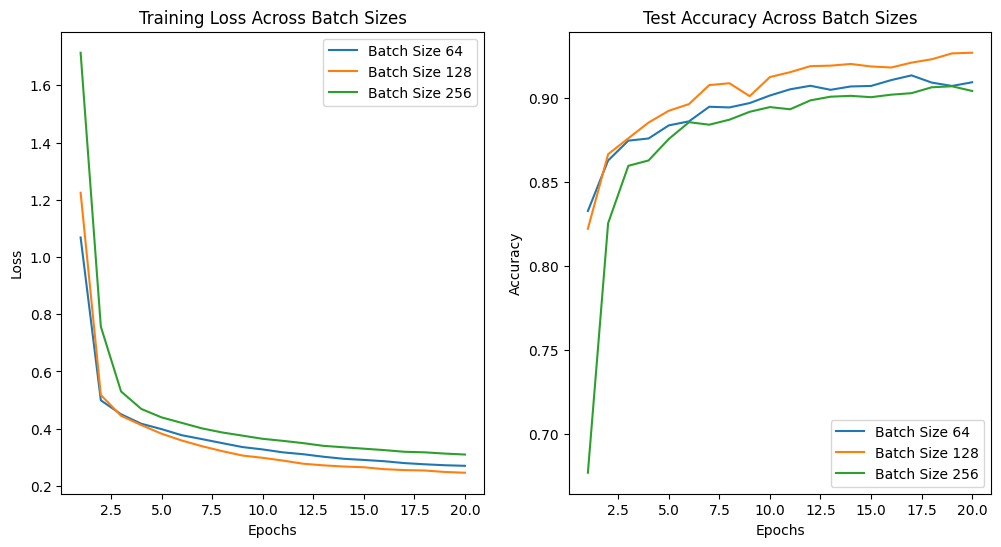

In [ ]:
plot_combined_metrics(all_epoch_losses, all_epoch_accuracies, batch_sizes)